# Shop Customer Data

## Importing required modules

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

## Getting dataset

In [44]:
df = pd.read_csv("data/proj86/Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Checking for nan values

In [45]:
df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [47]:
df["Profession"].fillna(mode(df["Profession"]), inplace=True)
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

## Exploring dataest

<Figure size 1000x1000 with 0 Axes>

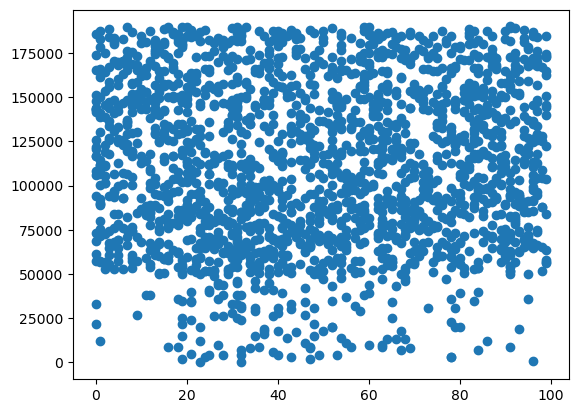

In [48]:
plt.figure(figsize=(10, 10))

_, ax = plt.subplots()
ax.scatter(df["Age"], df["Annual Income ($)"])

## Pre-Processing

In [27]:
df.drop(["CustomerID"], inplace=True, axis=1)

In [28]:
labels = {}
for column in df.keys():
    if pd.api.types.is_object_dtype(df[column]):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column]) + 1
        labels[column] = le.classes_
        

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  2000 non-null   int64
 1   Age                     2000 non-null   int64
 2   Annual Income ($)       2000 non-null   int64
 3   Spending Score (1-100)  2000 non-null   int64
 4   Profession              2000 non-null   int64
 5   Work Experience         2000 non-null   int64
 6   Family Size             2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [30]:
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,2,19,15000,39,6,1,4
1,2,21,35000,81,3,3,3
2,1,20,86000,6,3,1,1
3,1,23,59000,77,8,0,2
4,1,31,38000,40,4,2,6


In [31]:
labels

{'Gender': array(['Female', 'Male'], dtype=object),
 'Profession': array(['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
        'Healthcare', 'Homemaker', 'Lawyer', 'Marketing'], dtype=object)}

In [32]:
df.drop("Spending Score (1-100)", axis=1, inplace=True)

In [33]:
X = df.drop("Annual Income ($)", axis=1)
y = df["Annual Income ($)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training data

In [34]:
rreg = RandomForestRegressor()
rreg.fit(X_train.values, y_train.values)
rreg.score(X_test.values, y_test.values)

-0.1902795195274356

In [35]:
from xgboost import XGBRegressor

xreg = XGBRegressor()
xreg.fit(X_train.values, y_train.values)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [36]:
xreg.score(X_test.values, y_test.values)

-0.3684219959599866

In [17]:
len(df)

2000

In [39]:
from sklearn.svm import SVR

svmr = SVR()
svmr.fit(X_train.values, y_train.values)
svmr.score(X_test.values, y_test.values)

-0.004616462335728544